# Proyecto 4: Clasificación de señales ECG - INFORME

### David Alejandro Henao - Maria Camila Bravo

## 1. Revisión teórica. Del artículo:
https://www.nature.com/articles/s41598-020-59821-7

### Resumen de la sección extracción de caracteríticas (Features extraction) 

Los métodos tradicionales, como las redes neuronales y las transformadas de Fourier o wavelets, aunque útiles, enfrentan limitaciones al intentar preservar la información temporal esencial y son poco interpretables. Estos enfoques resultan ineficaces para realizar clasificaciones precisas en patologías como la fibrilación auricular (AFIB), donde se presentan distorsiones o la ausencia de ondas clave en el ECG, como la onda P. En vista de que la demanda de diagnósticos automáticos de alta precisión para afecciones cardíacas ,la política de salud pública de implementar procedimientos de cribado más amplios y la adopción de dispositivos portátiles habilitados para ECG ha aumentado, el estudio presenta un nuevo método de extracción de características de ECG. Este método, al igual que otros, deben tener en cuenta la variabilidad interpersonal e intrapersonal de las señales ECG, la distorsión por ruido y la ausencia de ondas o segmentos en muchos casos de arritmia.

Este nuevo método para la extracción de características en señales ECG se enfoca en analizar cómo se distribuyen y se relacionan ciertos atributos de las ondas en una señal de ECG, en términos tanto de su forma (morfología) como de su comportamiento en el tiempo Este enfoque permite capturar patrones específicos que no dependen únicamente de la presencia de ondas tradicionales, como la onda P, lo cual es crucial cuando estas ondas están ausentes o distorsionadas, como en el caso de la fibrilación auricular. Además, el proceso de normalización de las señales, junto con la incorporación de factores demográficos como edad y género, permite mejorar la comparabilidad de las señales entre individuos y reducir la variabilidad intrapersonal e interpersonal. Esto aumenta la precisión y robustez del análisis, especialmente en la clasificación de arritmias con señales afectadas por distorsiones o la falta de ondas clave. La integración con algoritmos avanzados como Gradient Boosting Trees mejora aún más la capacidad de clasificación, permitiendo obtener resultados altamente precisos que son comparables a los obtenidos por cardiólogos, incluso en casos complicados de arritmias.


### Discusión sobre la ausencia de ondas en el complejo PQRS:

Cuando desaparecen ciertas ondas del complejo PQRS en el ECG debido a enfermedades, el análisis de la señal se enfrenta a una pérdida de información crucial que complica la interpretación y clasificación de las arritmias. Las estrategias para abordar este desafío se basan en la extracción de características alternativas y métodos analíticos que aprovechan la información restante en la señal. A continuación, se amplían los enfoques previamente descritos:

ESTRATEGIAS DE MANEJO:

1. Análisis de intervalos RR:
Los intervalos RR se calculan como el tiempo entre picos R consecutivos, proporcionando información sobre el ritmo cardíaco y su regularidad.
En arritmias como la fibrilación auricular (AFIB), donde las ondas P están ausentes o reemplazadas por ondas de fibrilación, la irregularidad de los intervalos RR es un indicador clave.
Este método permite caracterizar ritmos rápidos, lentos e irregulares sin depender de las ondas ausentes.

2. Transformada de Fourier y Wavelet:
Estas herramientas analizan la señal en el dominio de la frecuencia, ayudando a identificar patrones anómalos asociados con arritmias.
La Transformada Wavelet, en particular, permite retener parte de la información temporal, útil para identificar alteraciones en la dinámica de la señal.

3. Modelos de Machine Learning:
Algoritmos de aprendizaje automático pueden manejar datos incompletos ajustándose dinámicamente a la ausencia de componentes.
El uso de características derivadas, como las relaciones entre amplitudes y tiempos de los picos restantes, puede aumentar la precisión del modelo.

4. Morfología, duración y patrón del complejo QRS:
El análisis del QRS es fundamental cuando las ondas P o T no son detectables.
Las duraciones prolongadas del QRS pueden señalar bloqueos de rama derecha o izquierda, mientras que cambios en su morfología pueden indicar arritmias ventriculares [1].
Este enfoque es efectivo porque el QRS se mantiene presente en la mayoría de los ECG incluso en condiciones severas[2].



### 2. Selección de base de datos.

In [1]:
import pandas as pd
ruta = "/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/Diagnostics.xlsx"
dataframe = pd.read_excel(ruta)


#### JUSTIFICACIÓN

#### EXTRACCIÓN DE REGISTROS

### 3. Herramientas computacionales. Hacer un minitutorial del uso de la herramienta NeuroKit (https://neuropsychology.github.io/NeuroKit/index.html) orientado al análisis de señales ECG (10%)

### **PASO1**
INSTALACIÓN:Para usar usar la herramienta es necesario instalar la libreria neurokit2. Para ello usamos la siguiente linea de código:

In [2]:
! pip install neurokit2

Defaulting to user installation because normal site-packages is not writeable


### **PASO2**
Una vez instalada la libreria importamos las demás librerias necesarias para su correecto uso:

In [3]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt

### **PASO 3**
Ahora que tenemos las librerias que necesitamos podemos cargar una señal ECG con la que hayamos trabajado. Tambien es necesario hacer una limpieza a la señal para reducir ruido.

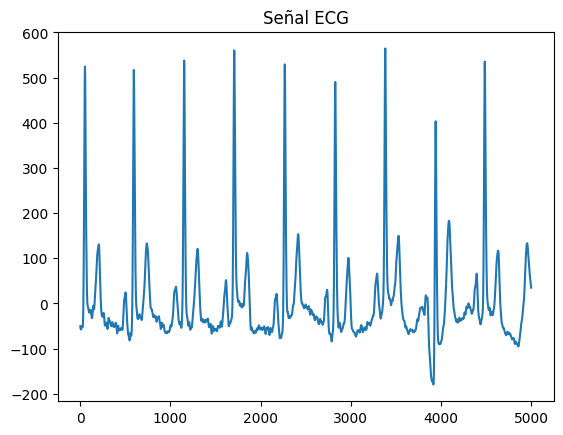

In [4]:
# Cargamos la señal  MUSE_20180112_134549_62000
#ecg_signal = pd.read_csv("Derivacion_II_Filtrados\MUSE_20180112_134549_62000_derivacion_II.csv")


# Ruta completa al archivo CSV de la señal ECG
ruta_archivo = "/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 4/Señales_punto3/MUSE_20180112_134549_62000_derivacion_II.csv"

# Cargar la señal ECG desde el archivo CSV
ecg_signal = pd.read_csv(ruta_archivo)

# Asegurarse de que la señal sea un array plano (si es necesario)
ecg_signal = ecg_signal.values.flatten()

# Limpiar la señal ECG utilizando neurokit2
ecg_limpia = nk.ecg_clean(ecg_signal, sampling_rate=500)

# Graficar la señal limpia
plt.plot(ecg_limpia)
plt.title("Señal ECG")
plt.show()


Neurokit tambien permite generar señales sintéticas o exportarlas desde la misma libreria. Por ejemplo con las siguientes lineas de código permite exportar datos de ekg en reposo que pueden usar usados para análisis.

In [5]:
data = nk.data("bio_resting_5min_100hz")
data.head()  # Print first 5 rows
#plt.plot(data[1])

,ECG,PPG,RSP
0,0.003766,-0.102539,0.494652
1,-0.017466,-0.103760,0.502483
2,-0.015679,-0.107422,0.511102
3,-0.001598,-0.110855,0.518791
4,0.002483,-0.112610,0.528669


### **PASO4**
Dentro del NeuroKit hay diferentes funciones para procesar las señales ECG y extraer características importantes de ellas, en los ejemplos mostrados vemos que permite: Análisis de la variabilidad de frecuencia cardíaca VFC, extracción y visualización de laditos individuales del corazón, localiazación de las ondas P,Q,S y T en el EKG, etc.  El procesamiento básico incluye la detección de los picos R y la extracción de intervalos RR.

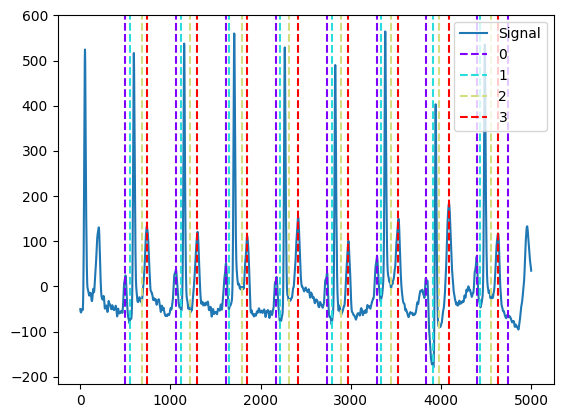

In [6]:
_, rpeaks = nk.ecg_peaks(ecg_limpia, sampling_rate=500)
signals, waves = nk.ecg_delineate(ecg_limpia, rpeaks, sampling_rate=500)
nk.events_plot([waves["ECG_P_Peaks"], waves["ECG_Q_Peaks"],waves["ECG_S_Peaks"],waves["ECG_T_Peaks"]], ecg_limpia)

### **Variabilidad de la frecuencia cardíaca (VFC)**

/Users/mcamilabravo/Library/Python/3.9/lib/python/site-packages/neurokit2/ecg/ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 595, 1152, 1708, 2268, 2828, 3382, 3941, 4486]), 'ECG_R_Peaks_Uncorrected': array([ 595, 1152, 1708, 2268, 2828, 3382, 3941, 4486]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.55585714, 0.557     , 0.556     , 0.56      , 0.56      ,
       0.554     , 0.559     , 0.545     ]), 'ECG_fixpeaks_drrs': array([-0.14399394,  0.1061008 , -0.0928382 ,  0.37135279,  0.        ,
       -0.55702918,  0.46419098, -1.29973475]), 'ECG_fixpeaks_mrrs': array([-0.18585441,  0.        , -0.14455343,  0.50593702,  0.50593702,
       -0.72276717,  0.28910687, -3.61383583]), 'ECG_fixpeaks_s12': array([ 0.1061008 , -0.0928382 ,  0.1061008 ,  0.        ,  0.        ,
        0.        , -0.55702918,  0.46419098]), 'ECG_fixpeaks_s22': array([ 0.1061008 , -0.0928382 ,  0.37135279, -0.55702918, -0.55702918,

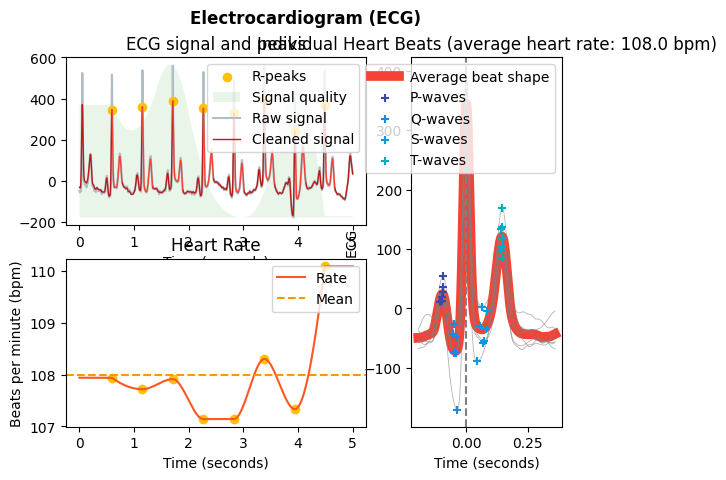

In [7]:
# Procesar la señal ECG
ecg_final, info = nk.ecg_process(ecg_limpia)
nk.ecg_plot(ecg_final)
print(info)

### **Detección de los picos P,Q,S y T**

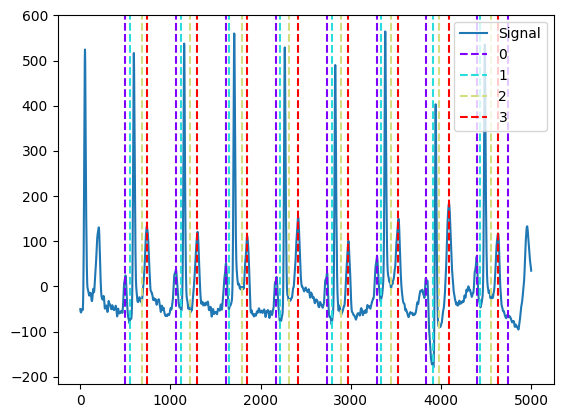

In [8]:
_, rpeaks = nk.ecg_peaks(ecg_limpia, sampling_rate=500)
signals, waves = nk.ecg_delineate(ecg_limpia, rpeaks, sampling_rate=500)
nk.events_plot([waves["ECG_P_Peaks"], waves["ECG_Q_Peaks"],waves["ECG_S_Peaks"],waves["ECG_T_Peaks"]], ecg_limpia)

### 4. Escoger diferentes señales de la base de datos del punto 2 y aplicar el tutorial del punto 3 (5%).

### 5. Con las características que extrae el neurokit y las discutidas en el punto 1 generar un conjunto de características para el presente trabajo. Incluir la característica de frecuencia de potencia máxima del Proyecto 3 (10%). No incluir más de 15 características ni menos de 5, justificar la selección (5%).

#### 6. Crear una rutina que aplique sobre todos los archivos de la base de datos la rutina 5 y almacene los resultados en un dataframe:

Todos los puntos realizados a continuación son con las características definidas

### 7. Código y análisis de resultados, donde se discutan por los menos tres diferentes arquitecturas de red (10%) y las matrices de confusión obtenidas (10%), de una red neuronal que permita la clasificación de las dos patologías cardiacas.

### 8. Consultar cómo funciona, realizar y discutir un ejemplo con los datos, del algoritmo de K means (10%) y máquinas de soporte vectorial

### 9. Hacer un informe con todos los puntos anteriores (10%). En el informe incluir: Consultar por lo menos tres equipos comerciales traen ya incorporados algoritmos de ayuda diagnóstica a partir de señales EKG (5%) y discutir brevemente las funcionalidades desde la teoría vista en el curso (5%)